In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv('/kaggle/input/students-performance-dataset/Student_performance_data _.csv')


In [10]:
# Substituindo 0 e 1 por 'Feminino' e 'Masculino'
df['Gender'] = df['Gender'].replace({0: 'Male', 1: 'Female'})

df['Ethnicity'] = df['Ethnicity'].replace({0: 'Caucasian', 1: 'African American', 2: 'Asian', 3: 'Other'})

df['ParentalEducation'] = df['ParentalEducation'].replace({0: 'None', 1: 'High School', 2: 'Some College', 3: 'Bachelors', 4: 'Higher'})

df['ParentalSupport'] = df['ParentalSupport'].replace({0: 'None', 1: 'Low', 2: 'Moderate', 3: 'High', 4: 'Very High'})

df['Extracurricular'] = df['Extracurricular'].replace({0: 'No', 1: 'Yes'})

df['Sports'] = df['Sports'].replace({0: 'No', 1: 'Yes'})

df['Music'] = df['Music'].replace({0: 'No', 1: 'Yes'})

df['Volunteering'] = df['Volunteering'].replace({0: 'No', 1: 'Yes'})

print(df)

      StudentID  Age  Gender         Ethnicity ParentalEducation  \
0          1001   17  Female         Caucasian      Some College   
1          1002   18    Male         Caucasian       High School   
2          1003   15    Male             Asian         Bachelors   
3          1004   17  Female         Caucasian         Bachelors   
4          1005   17  Female         Caucasian      Some College   
...         ...  ...     ...               ...               ...   
2387       3388   18  Female         Caucasian         Bachelors   
2388       3389   17    Male         Caucasian       High School   
2389       3390   16  Female         Caucasian      Some College   
2390       3391   16  Female  African American              None   
2391       3392   16  Female         Caucasian      Some College   

      StudyTimeWeekly  Absences  Tutoring ParentalSupport Extracurricular  \
0           19.833723         7         1        Moderate              No   
1           15.408756        

In [11]:
# Mostrar as primeiras linhas do dataframe
print(df.head())

# Resumo estatístico dos dados numéricos
print(df.describe())

# Verificar os tipos de dados
print(df.info())


   StudentID  Age  Gender  Ethnicity ParentalEducation  StudyTimeWeekly  \
0       1001   17  Female  Caucasian      Some College        19.833723   
1       1002   18    Male  Caucasian       High School        15.408756   
2       1003   15    Male      Asian         Bachelors         4.210570   
3       1004   17  Female  Caucasian         Bachelors        10.028829   
4       1005   17  Female  Caucasian      Some College         4.672495   

   Absences  Tutoring ParentalSupport Extracurricular Sports Music  \
0         7         1        Moderate              No     No   Yes   
1         0         0             Low              No     No    No   
2        26         0        Moderate              No     No    No   
3        14         0            High             Yes     No    No   
4        17         1            High              No     No    No   

  Volunteering       GPA  GradeClass  
0           No  2.929196         2.0  
1           No  3.042915         1.0  
2          

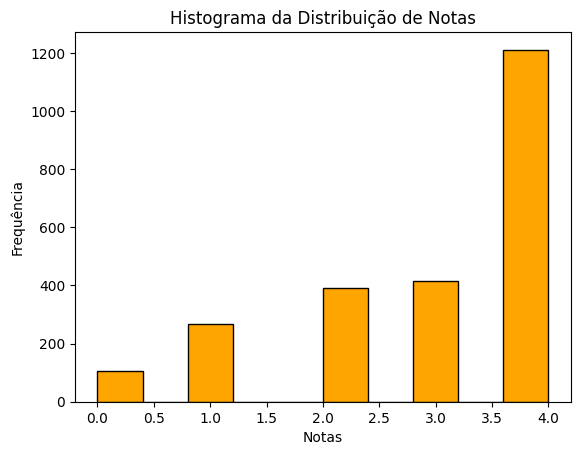

In [12]:
# Criando um histograma para a distribuição das idades
plt.hist(df['GradeClass'], bins=10, color='orange', edgecolor='black')
plt.title('Histograma da Distribuição de Notas')
plt.xlabel('Notas')
plt.ylabel('Frequência')
plt.show()

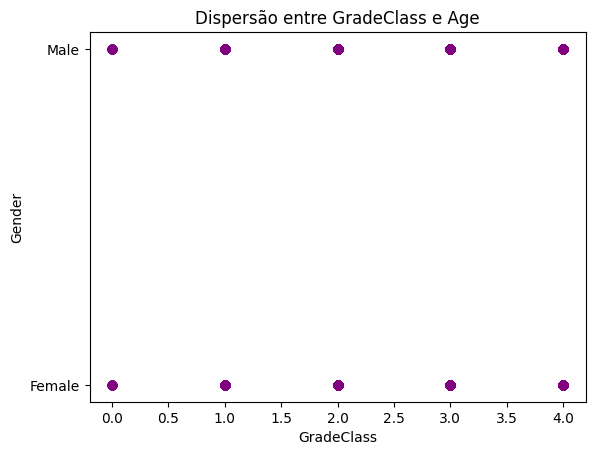

In [13]:

# Criando um gráfico de dispersão
plt.scatter(df['GradeClass'], df['Gender'], color='purple')
plt.title('Dispersão entre GradeClass e Age')
plt.xlabel('GradeClass')
plt.ylabel('Gender')
plt.show()

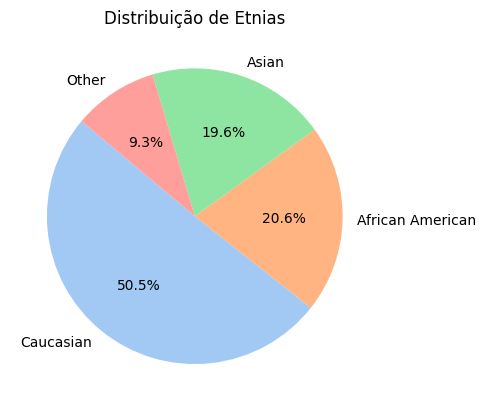

In [16]:
# Contando a frequência de cada Etnias
Ethnicity_counts = df['Ethnicity'].value_counts()

# Criando um gráfico de pizza
plt.pie(Ethnicity_counts, labels=Ethnicity_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title('Distribuição de Etnias')
plt.show()

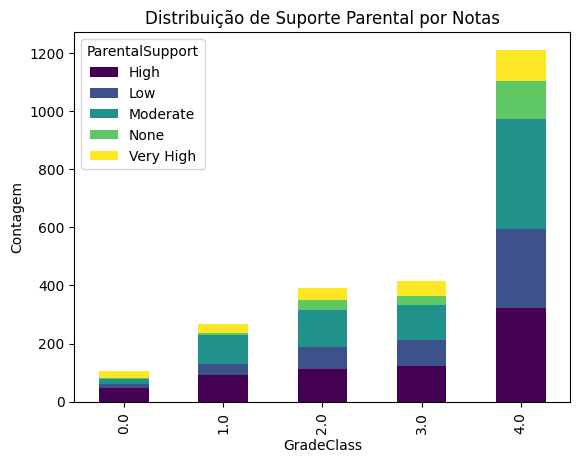

In [18]:
age_counts_per_grade = df.groupby(['GradeClass', 'ParentalSupport']).size().unstack()

# Criando um gráfico de barras empilhadas
age_counts_per_grade.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Distribuição de Suporte Parental por Notas')
plt.xlabel('GradeClass')
plt.ylabel('Contagem')
plt.show()

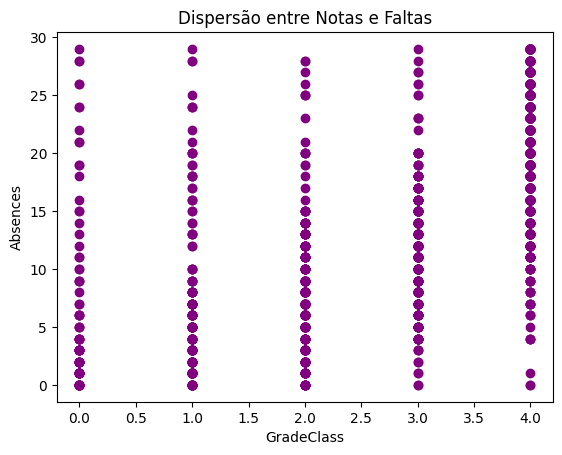

In [21]:
# Criando um gráfico de dispersão
plt.scatter(df['GradeClass'], df['Absences'], color='purple')
plt.title('Dispersão entre Notas e Faltas')
plt.xlabel('GradeClass')
plt.ylabel('Absences')
plt.show()